In [56]:
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import display, HTML
from pytrends.request import TrendReq

#BURAK ŞENOL

In [57]:
data = pd.read_csv("covid_19_data.csv")

# Dataset : 
# Global Covid 19 Tespit Edilen Vaka Sayısı ve Diğer Bilgiler.
# https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset/data?select=time_series_covid_19_confirmed.csv

data

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
58296,58297,07/06/2020,Zacatecas,Mexico,2020-07-07 04:34:00,1140.0,112.0,764.0
58297,58298,07/06/2020,Zakarpattia Oblast,Ukraine,2020-07-07 04:34:00,3375.0,111.0,1001.0
58298,58299,07/06/2020,Zaporizhia Oblast,Ukraine,2020-07-07 04:34:00,597.0,17.0,444.0
58299,58300,07/06/2020,Zhejiang,Mainland China,2020-07-07 04:34:00,1269.0,1.0,1267.0


In [58]:
# Tarihler arasından seçim yapmak için, to_datetime ile datetime referans işlemini yaparız.
data['ObservationDate'] = pd.to_datetime(data['ObservationDate'])


######################### Datetime İle Confirmed Sayısı Gruplamak: ##########################
# Elimizde olan data, aynı günler için ayrı ayrı 'Confirmed' güncellemesi yapmış.
# Bu yüzden aynı tarihler içerisindeki güncellenen 'Confirmed' verilerini tek bir tarihe toplayıp "Tek Tarih - Toplam Veri"..
#.. olarak sunmak için, aynı tarihlerdeki verileri toplayıp tek bir gruba yükleriz.
# Örnek : 
# 01-02-2020 : 20 Vaka (A Şehri)
# 01-02-2020 : 17 Vaka (B Şehri)
#...............................
# 01-02-202 : 37 Vaka (A + B Şehirleri, o tarih içerisindeki "Toplam Vakalar")
test = data['Confirmed'].groupby(data['ObservationDate'].dt.to_period('D')).sum()
df = pd.DataFrame(data=test, columns=['Date', 'Confirmed'])
df['Date'] = df.index
df.reset_index(drop=True, inplace=True)
df['Date'] = df['Date'].dt.to_timestamp('s').dt.strftime('%m-%d-%Y')


######################## Datetime İle Recovered Sayısı Gruplamak: #########################
# Tablo üzerinde daha sonra kullanırken, görsel bir anlam ifade etmesi için, confirmed değerlerinin yanında...
# Aynı tarih içerisinde iyileşen hasta sayısı ("Recovered") değerlerinide ekleriz.
test2 = data['Recovered'].groupby(data['ObservationDate'].dt.to_period('D')).sum()
df2 = pd.DataFrame(data=test2, columns=['Date', 'Recovered'])
df2['Date'] = df2.index
df2.reset_index(drop=True, inplace=True)
df2['Date'] = df2['Date'].dt.to_timestamp('s').dt.strftime('%m-%d-%Y')



# df = Date ve Confirmed bilgilerinin bulunduğu tablo.
# df2 = Date ve Recovered bilgilerinin bulunduğu tablo.
# İlk tablomuzdaki Confirmed özniteliğinin yanına 'Recovered' özniteliğinide ekleyip genel bir tablo oluşturalım.
df['Recovered'] = df2['Recovered']

# Genel Tablomuz.
# Bu tabloda, Verilen tarih içerisinde, datasetimiz içinde kaydedilmiş tüm şehirlerin toplam...
# ..."Kanıtlanmış Covid-19 Vakaları (Confirmed)" ve... 
# ..."Kanıtlanmış Covid-19'ten İyileşenlerin (Recovered)" bilgileri bulunmaktadır.
# !!!!!!!!! DEFAULT TARİH AYARI = AY / GÜN / YIL !!!!!!!!!!!!!!!
df

,Date,Confirmed,Recovered
0,01-22-2020,555.0,28.0
1,01-23-2020,653.0,30.0
2,01-24-2020,941.0,36.0
3,01-25-2020,1438.0,39.0
4,01-26-2020,2118.0,52.0
...,...,...,...
162,07-02-2020,10869739.0,5754006.0
163,07-03-2020,11074878.0,5863847.0
164,07-04-2020,11267309.0,6059565.0
165,07-05-2020,11449707.0,6179006.0


In [59]:


# Belli tarih aralığındaki veriyi almak için filtreleme uygularız.
baslangic_tarihi = '02-22-2020' # 22 Ocak
bitis_tarihi = '06-22-2020'     # 22 Haziran

filtre = (df['Date'] > baslangic_tarihi) & (df['Date'] <= bitis_tarihi)

# İstediğimiz tarihler arasındaki veriyi çekip 'yeni_data' değişkenine atarız.
yeni_data = df.loc[filtre]


yeni_data

,Date,Confirmed,Recovered
32,02-23-2020,78985.0,23394.0
33,02-24-2020,79570.0,25227.0
34,02-25-2020,80415.0,27905.0
35,02-26-2020,81397.0,30384.0
36,02-27-2020,82756.0,33277.0
...,...,...,...
148,06-18-2020,8488977.0,4155099.0
149,06-19-2020,8664986.0,4245777.0
150,06-20-2020,8791804.0,4378255.0
151,06-21-2020,8955536.0,4447086.0


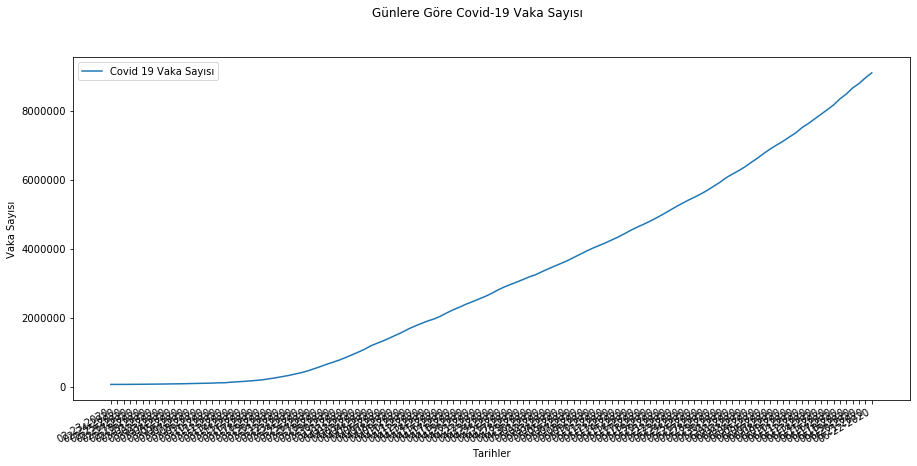

In [68]:
tarihler = yeni_data['Date']
vakalar = yeni_data['Confirmed']

plt.rcParams['figure.figsize'] = [15, 7]
#plt.plot_date(tarihler, cases)

# Tabloya göre gün gün toplam vaka sayılarını tabloya dönüştürürüz.
plt.plot(tarihler, vakalar)

# Chart üzerine legend ekleyelim:
plt.legend(["Covid 19 Vaka Sayısı"])

# Bilgi / Altyazı
plt.suptitle("Günlere Göre Covid-19 Vaka Sayısı")
plt.xlabel("Tarihler")
plt.ylabel("Vaka Sayısı")
plt.gcf().autofmt_xdate()
plt.show

# Figure'kaydetmek için.
plt.savefig("Covid-19-Vaka-Sayısı.png")

In [61]:
# pytrends ile Google Trends API yardımıyla İstediğimiz keyword'lerde trend analiz sonuçlarına ulaşıyoruz.
# Dökümantasyona bu linkten ulaşabilirsiniz : https://pypi.org/project/pytrends/


# Keywords = [ Travel, Flight, Hotel, Corona]
pytrends = TrendReq()

keywords = ['Travel', 'Flight', 'Hotel', 'Corona']
pytrends.build_payload(keywords, timeframe='2020-01-22 2020-06-22')

trend_data = pytrends.interest_over_time()
trend_data

,Travel,Flight,Hotel,Corona,isPartial
date,,,,,
2020-01-22,4,4,20,2,False
2020-01-23,4,4,20,3,False
2020-01-24,4,4,21,5,False
2020-01-25,4,4,20,7,False
2020-01-26,4,4,20,9,False
...,...,...,...,...,...
2020-06-18,3,2,12,15,False
2020-06-19,3,2,13,14,False
2020-06-20,3,2,14,15,False


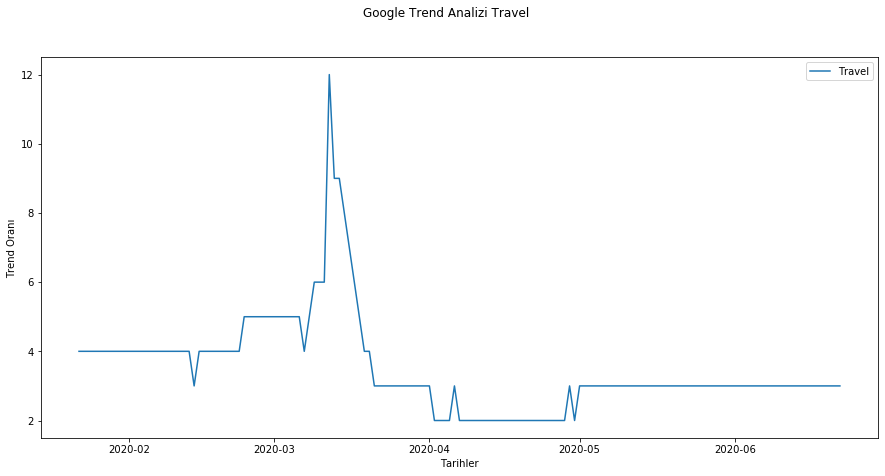

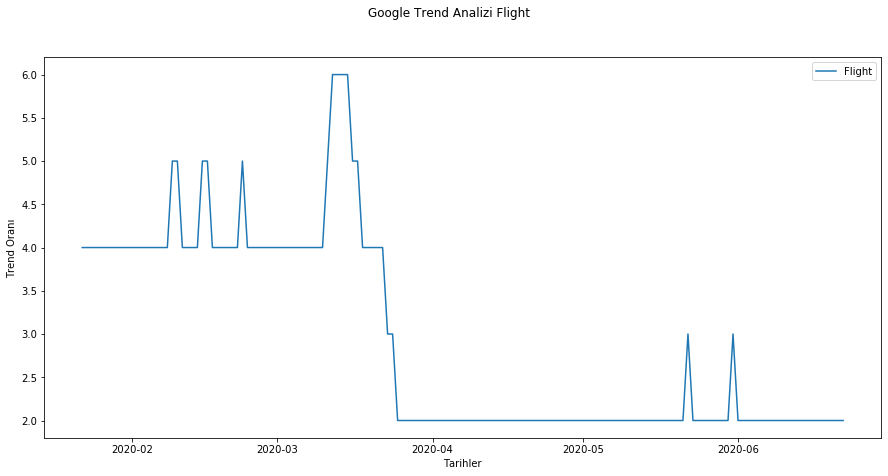

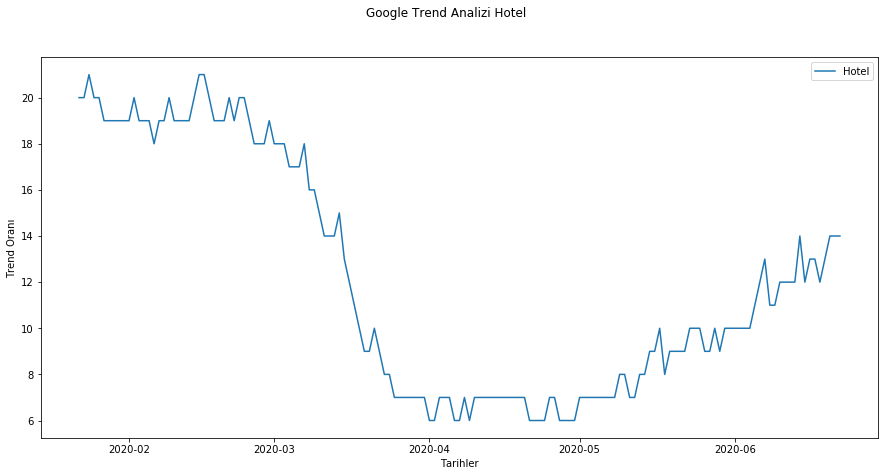

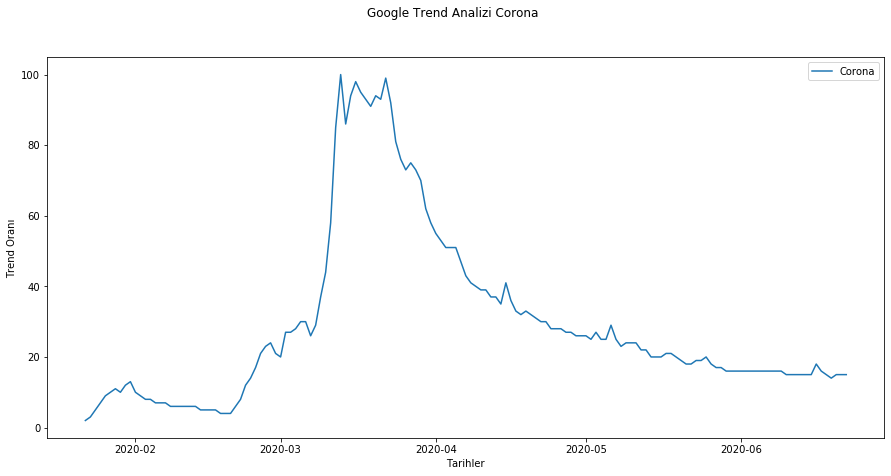

In [72]:
# Google Trend API kullanarak elde ettiğimiz verileri, her keyword için ayrı ayrı olacak şekilde yazdıralım.

for element in keywords:
    # Bu for döngüsü ile keyword listemizdeki elemanları tek tek trend analizlerini yaparak tabloya yazdırırız.
    plt.plot(trend_data[element])

    # Chart üzerine legend ekleyelim:
    plt.legend([element])

    # Bilgi / Altyazı
    plt.suptitle("Google Trend Analizi " + element)
    plt.xlabel("Tarihler")
    plt.ylabel("Trend Oranı")
    # Hazırlanan figure'leri .png olarak kaydetmek için:
    plt.savefig(str([element]) + "_Trends" + ".png")
    plt.show()